In [1]:
import cv2
import numpy as np
import os
import tensorflow as tf
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt
import tflearn
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression


curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [96]:
Train_dir='f:/cvsdp/Train'
Test_dir='f:/cvsdp/Test'
IMG_SIZE=50
LR=1e-3
MODEL_NAME="catvsdogpredictor"
def CreateLabel(img_name):
    word_label=img_name.split('.')[-3]
    if word_label=="cat":
        return np.array([1,0])
    elif word_label=="dog":
        return np.array([0,1])
    

In [97]:
def CreateTrainData():
    Trainig_data=[]
    for img in tqdm(os.listdir(Train_dir)):
        path=os.path.join(Train_dir,img)
        img_data=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_data=cv2.resize(img_data,(IMG_SIZE,IMG_SIZE))
        Trainig_data.append([np.array(img_data),CreateLabel(img)])
    shuffle(Trainig_data)
    np.save('traindata.npy',Trainig_data)
    return Trainig_data

In [98]:
def CreateTestData():
    Testing_data=[]
    for img in tqdm(os.listdir(Test_dir)):
        path=os.path.join(Test_dir,img)
        img_num=img.split('.')[-1]
        img_data=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_data=cv2.resize(img_data,(IMG_SIZE,IMG_SIZE))
        Testing_data.append([np.array(img_data),img_num])
    shuffle(Testing_data)
    np.save('testdata.npy',Testing_data)
    return Testing_data

In [99]:
train_data=CreateTrainData()
test_data=CreateTestData()


100%|███████████████████████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 455.46it/s]


In [100]:
train=train_data[:-250]
test=train_data[-255:]

In [106]:
x_train=np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y_train=[i[1] for i in train]
x_test=np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y_test=[i[1] for i in test]

In [107]:
train

[[array([[222, 167, 113, ..., 157, 136, 150],
         [195, 150, 123, ..., 108, 162, 146],
         [174, 160, 152, ..., 107, 109, 201],
         ...,
         [100, 106,  99, ...,  36,  43,  49],
         [ 79,  94,  79, ...,  37,  43,  44],
         [ 86,  99,  89, ...,  63,  54,  42]], dtype=uint8), array([0, 1])],
 [array([[221, 219, 221, ..., 196, 198, 203],
         [220, 222, 213, ..., 191, 207, 201],
         [217, 212, 213, ..., 177, 195, 197],
         ...,
         [133, 133, 132, ..., 120, 117, 116],
         [137, 136, 137, ..., 120, 124, 121],
         [144, 139, 139, ..., 119, 119, 121]], dtype=uint8), array([0, 1])],
 [array([[ 86,  77,  81, ...,  92,  89,  94],
         [ 85,  79,  78, ...,  91,  87,  93],
         [ 83,  80,  82, ...,  92,  85,  85],
         ...,
         [ 83,  83,  92, ..., 219, 228, 231],
         [ 82,  84,  86, ..., 215, 222, 224],
         [ 82,  81,  85, ..., 188, 166, 216]], dtype=uint8), array([1, 0])],
 [array([[ 95,  97,  94, ...,  37,  4

In [108]:
tf.reset_default_graph()
convnet=input_data(shape=[None,IMG_SIZE,IMG_SIZE,1],name='input')
convnet=conv_2d(convnet,32,5,activation='relu')
convnet=max_pool_2d(convnet,5)
convnet=conv_2d(convnet,64,5,activation='relu')
convnet=max_pool_2d(convnet,5)
convnet=conv_2d(convnet,128,5,activation='relu')
convnet=max_pool_2d(convnet,5)
convnet=conv_2d(convnet,64,5,activation='relu')
convnet=max_pool_2d(convnet,5)
convnet=conv_2d(convnet,32,5,activation='relu')
convnet=max_pool_2d(convnet,5)

convnet=fully_connected(convnet,1024,activation='relu')
convnet=dropout(convnet,0.8)
convnet=fully_connected(convnet,2,activation='softmax')
convnet=regression(convnet,optimizer='adam',learning_rate=LR,loss='categorical_crossentropy',name='targets')
model=tflearn.DNN(convnet,tensorboard_dir='log',tensorboard_verbose=0)




In [115]:
model.fit({'input':x_train},{'targets':y_train},n_epoch=10,validation_set=({'input':x_test},{'targets':y_test}),
         snapshot_step=250,show_metric=True,run_id=MODEL_NAME)

Training Step: 119  | total loss: 0.53091 | time: 0.983s
| Adam | epoch: 030 | loss: 0.53091 - acc: 0.7541 -- iter: 192/256
Training Step: 120  | total loss: 0.50577 | time: 2.333s
| Adam | epoch: 030 | loss: 0.50577 - acc: 0.7740 | val_loss: 0.82308 - val_acc: 0.5922 -- iter: 256/256
--


In [ ]:
fig=plt.figure(figsize=(16,12))

ValueError: num must be 1 <= num <= 16, not 17

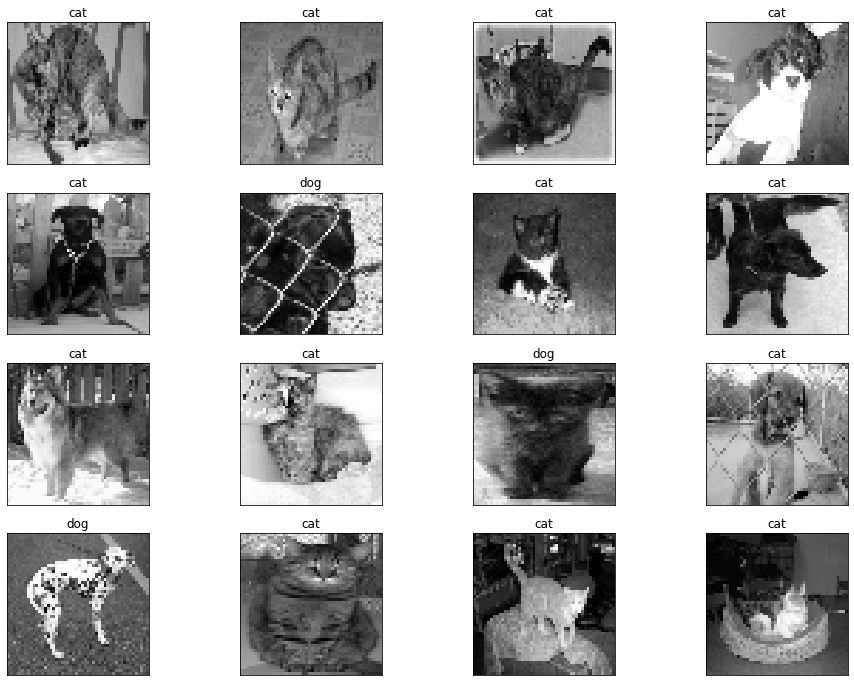

In [116]:
fig=plt.figure(figsize=(16,12))
for num,data in enumerate(test_data[:50]):
    img_num=data[1]
    img_data=data[0]
    y=fig.add_subplot(4,4,num+1)
    orig=img_data
    data=img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    model_out=model.predict([data])[0]
    if np.argmax(model_out)==1:
        str_label='dog'
    else:
        str_label='cat'
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()

In [10]:
img_name='dog.211'

In [13]:
img_name.split('.')[-2]

'dog'